# Interactive visualization of propagation of light in Jupyter notebook

Matplotlib present useful visualization tools for showing the intensity profiles at a distance z in an interactive fashion in jupyter notebooks. Here, we show how to use it.


In [15]:
# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In the first place, we well determine the intensity distribution XZ for an object. 

In [16]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from numpy.fft.fftpack import fft, ifft
from scipy.signal import convolve2d

%matplotlib inline  

# size of figures
import matplotlib
from ipywidgets import interactive

In [17]:
# Initial parameters
x0 = np.linspace(-1050 * um, 1050 * um, 1024*2)
z0 = np.linspace(-0.125*um, 4 * mm, 1024*4)
wavelength = 0.6238 * um*10

In [18]:
# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=2000 * um, theta=0. * degrees)

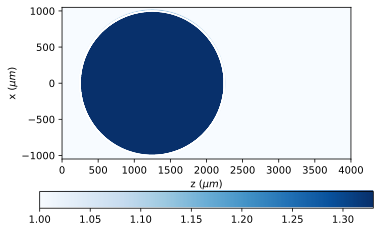

In [19]:
# insert sphere
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)

u1.sphere(r0=(0,1.25*mm), radius=(1*mm,1*mm),refraction_index=1.33, angle=0)
u1.draw_refraction_index(scale='scaled', colorbar_kind='horizontal');

In [20]:
#loading the incident field in the simulation
u1.incident_field(u0)  

In [21]:
# BPM propagation 
u1.BPM(verbose=False)

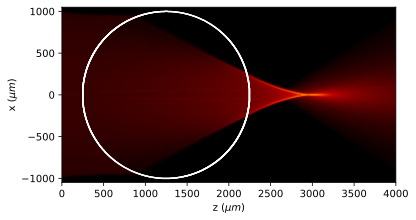

In [22]:
#simple drawing
u1.draw(logarithm=True, scale='scaled', draw_borders=True);

In [23]:
#interactive function
#from matplotlib.lines import Line2D
intensity=abs(u1.u)**2
Imax=intensity.max()

In [24]:
def __interact2__(i):
    plt.plot(u1.x,abs(intensity[:,i]),'k')
    plt.title("z = {:2.3f} mm".format(u1.z[i]/1000))
    plt.ylim(0, Imax)
    plt.xlim(-100*um,100*um)
                  

In [25]:
interactive(__interact2__, i=(0,len(u1.z)-1,1))

interactive(children=(IntSlider(value=2047, description='i', max=4095), Output()), _dom_classes=('widget-inter…